### 2. Preguntas a resolver

In [1]:
##Importar las librerías requeridas para el análisis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
##Definir tamaño máximo de filas a mostrar
pd.set_option('display.max_rows', 100)

In [2]:
##Importar el dataset del CSV
df = pd.read_csv('../data/accidentesV2.csv')

In [6]:
##Visualizar los primeros datos
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLÁNTICO,BARRANQUILLA (CT),8001,MOTO,1/01/2010,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLÁNTICO,LURUACO,8421,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592,MOTO,1/01/2010,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010,MOTO,1/01/2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


#### 2.1. ¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?

In [3]:
##Departamentos con mayor número de delitos registrados
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format = '%d/%m/%Y')
df['FECHA HECHO'].dt.year
df.groupby(['DEPARTAMENTO']).apply(lambda x: x[x['FECHA HECHO'].dt.year>2017]['CANTIDAD'].sum()).sort_values(ascending=False).head(3)

DEPARTAMENTO
CUNDINAMARCA    3880
ANTIOQUIA       3699
VALLE           3114
dtype: int64

#### 2.2. Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito.

[Text(0, 0, '34319'),
 Text(0, 0, '18230'),
 Text(0, 0, '4531'),
 Text(0, 0, '2096'),
 Text(0, 0, '552'),
 Text(0, 0, '73'),
 Text(0, 0, '4')]

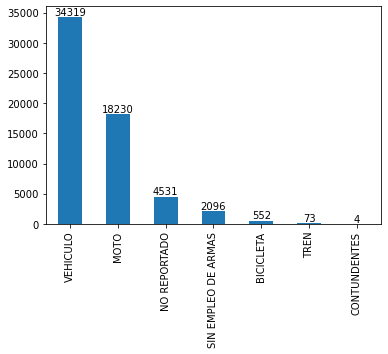

In [7]:
armas_medios=df['ARMAS MEDIOS'].value_counts()
armas_medios.sort_values(ascending=False,inplace=True)
graph = armas_medios.plot.bar()
graph.bar_label(graph.containers[0])

Para el caso de accidentes de tránsito y lesiones personales el medio más común en el que ocurren estos hechos es en vehículos

#### 2.3. Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

In [16]:
# Agrupar por fecha y género sumando la columna cantidad
df_new = df.groupby([df['FECHA HECHO'].dt.strftime('%Y'),'GRUPO ETARÍO'])[['CANTIDAD']].sum().reset_index()

In [17]:
# Convertir las filas de género en columnas para poder graficar
df_new = df_new .pivot_table(index=['FECHA HECHO'], columns=['GRUPO ETARÍO'], values='CANTIDAD').fillna(0)

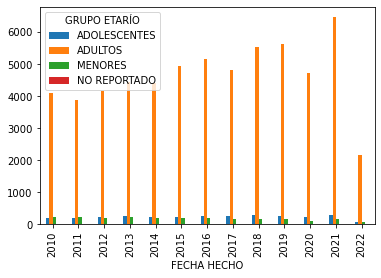

In [18]:
# Graficar resultados por año y género
df_new.plot(kind='bar')
plt.show()

In [19]:
# Agrupar por fecha y género sumando la columna cantidad
df_new = df.groupby([df['FECHA HECHO'].dt.strftime('%Y'),'GENERO'])[['CANTIDAD']].sum().reset_index()

In [20]:
# Convertir las filas de género en columnas para poder graficar
df_new = df_new .pivot_table(index=['FECHA HECHO'], columns=['GENERO'], values='CANTIDAD').fillna(0)

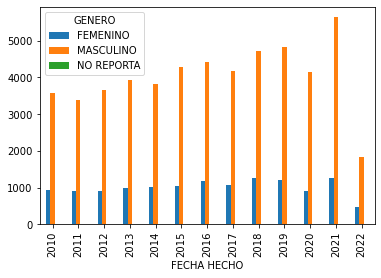

In [21]:
# Graficar resultados por año y género
df_new.plot(kind='bar')
plt.show()

#### 2.4. ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [7]:
plt.figure(figsize = (15, 8))
# Convertir a formato de fecha
df['FECHA HECHO']=pd.to_datetime(df['FECHA HECHO'],format='%d/%m/%Y')
# Contar la cantidad de hechos agrupando por mes
count_month=df.groupby(df['FECHA HECHO'].dt.month_name().str[:3]).agg('count')['CANTIDAD']
# Ver el total de los datos
count_month.sum()

59805

<Figure size 1080x576 with 0 Axes>

In [15]:
#Calcular la desviación estándar de los datos
count_month.std()

326.78464551666826

<AxesSubplot:xlabel='FECHA HECHO'>

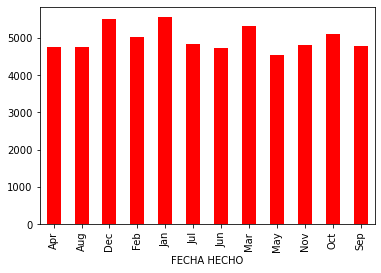

In [8]:
# Graficar
count_month.plot(kind='bar', color='red')

#### 2.5 Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

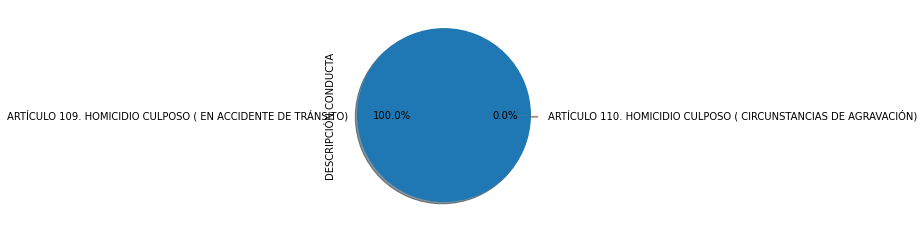

In [16]:
tipo=df['DESCRIPCIÓN CONDUCTA'].value_counts()
tipo.sort_values(ascending=False,inplace=True)
graph = tipo.plot(kind="pie", autopct='%1.1f%%',shadow=True, explode=[0.05, 0.05])